In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data for red wine
df_rw = pd.read_csv(r"Data\wine+quality\winequality-red.csv", sep=';')
df_rw.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df_rw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
# See the count of unique data point in each variable

In [5]:
df_rw.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

## 1. Data Cleaning: Handling Missing Values, Outliers, Duplicates, Normalization, and Transformation

### Check for null values

In [6]:
df_rw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No nulls identified 

In [7]:
# Handling Missing Data

# 1. Imputing missing values using mean, median, or mode.
# 2. Dropping rows or columns with excessive missing data.

### Check for Duplicates

In [8]:
print("Total number of rows in Data", len(df_rw))
print("Number of Complete duplicate values in Red wine Data ",df_rw.duplicated().sum())
print("Proportion of Duplicates in Data", df_rw.duplicated().sum()/len(df_rw)*100, "%" )

Total number of rows in Data 1599
Number of Complete duplicate values in Red wine Data  240
Proportion of Duplicates in Data 15.0093808630394 %


The count of Duplicates is high which might cause overfitting or bias in model training. Dropping the duplciates

In [9]:
df_rw.drop_duplicates(inplace = True)
print("Total number of rows in Data", len(df_rw))

Total number of rows in Data 1359


### Check for Outliers

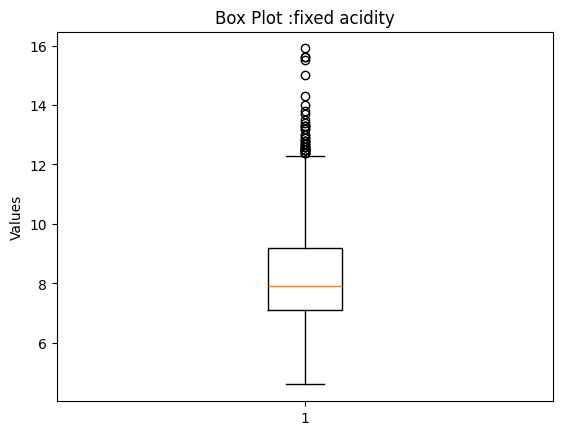

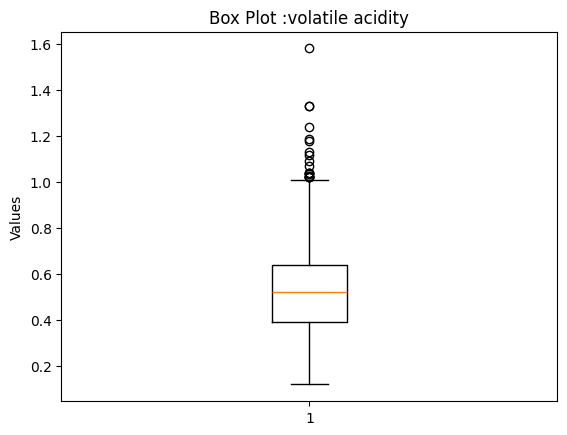

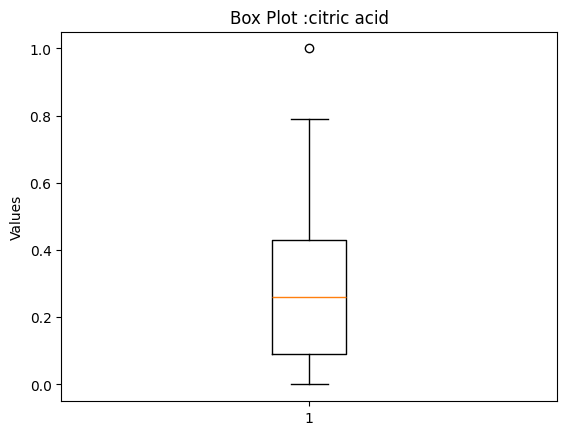

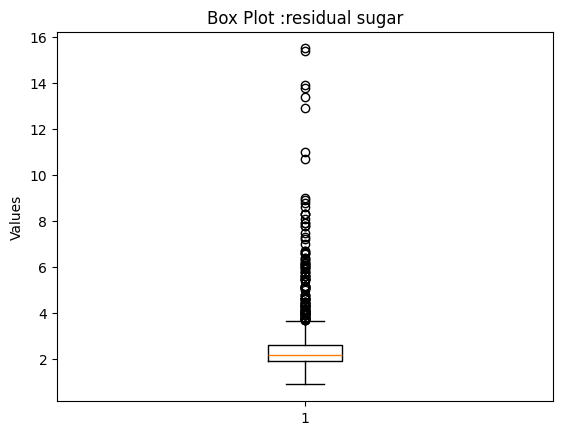

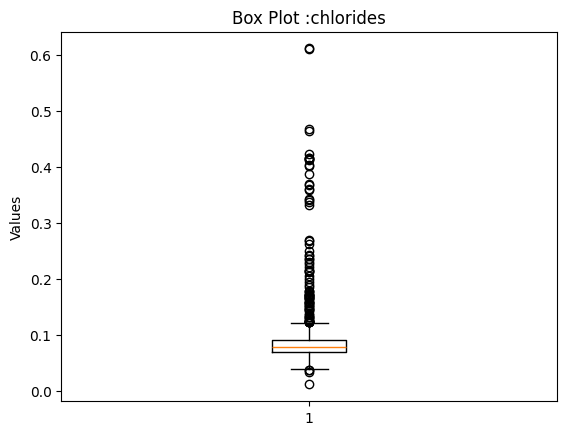

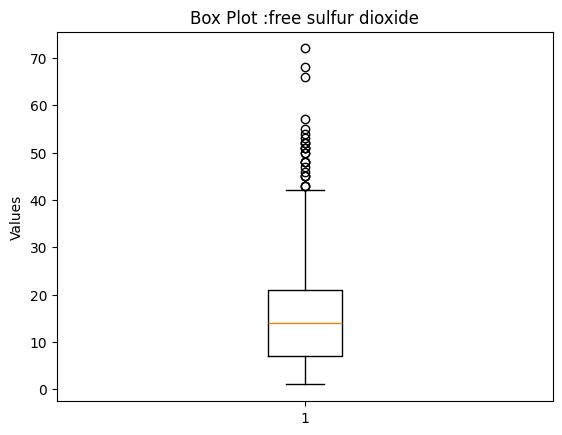

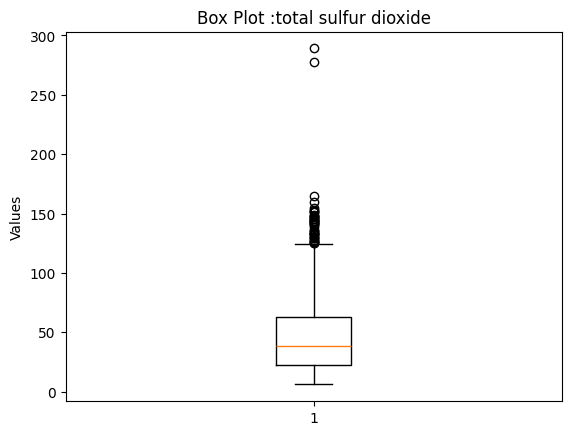

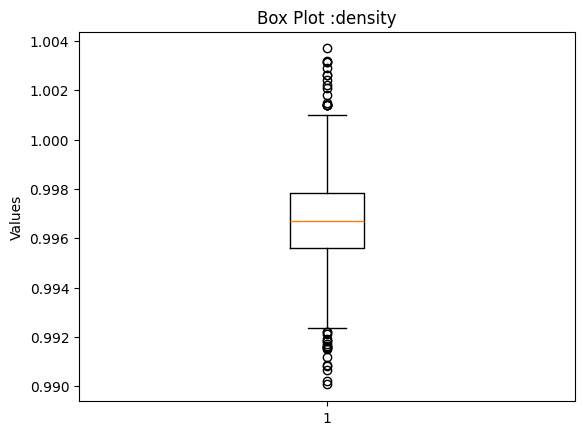

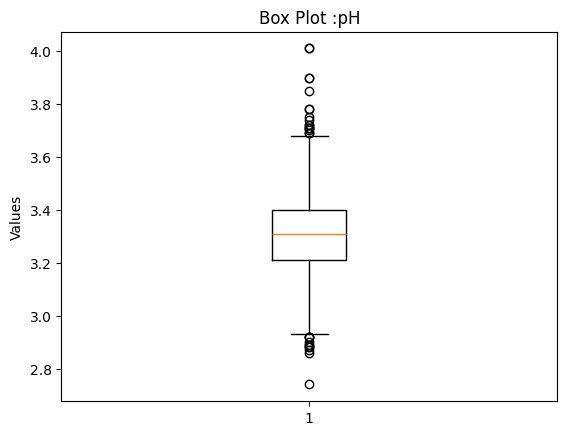

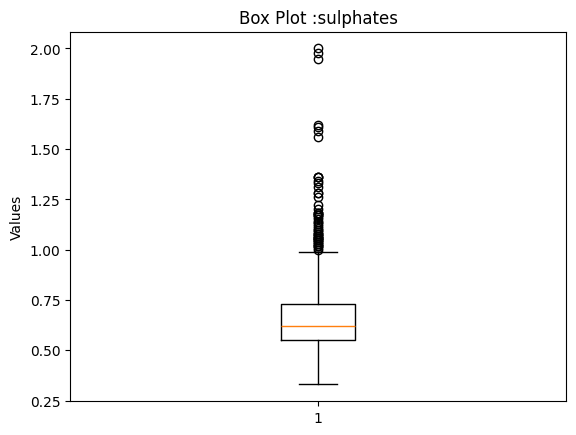

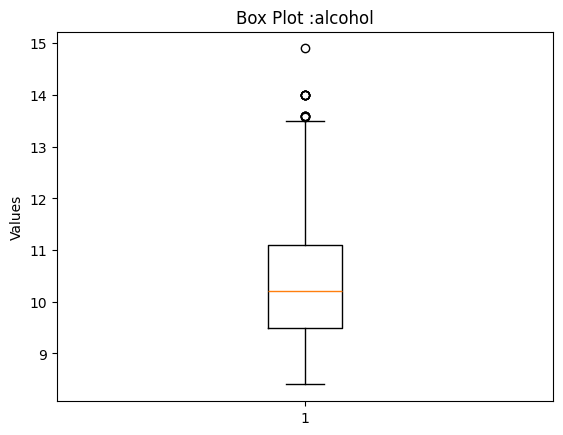

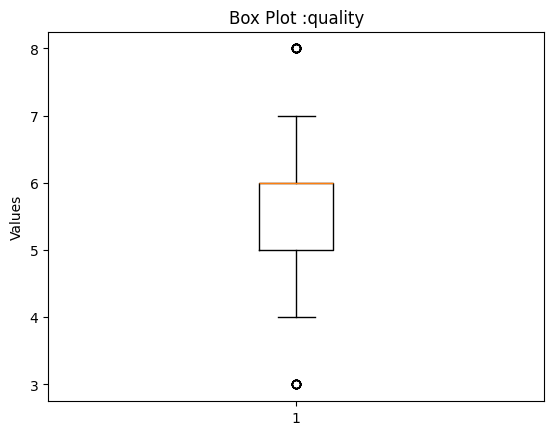

In [10]:
# Create a box plot

for column in df_rw.columns:
    plt.boxplot(df_rw[column])

    # Add a title and labels
    plt.title('Box Plot :'+ column)
    plt.ylabel('Values')
    
    # Show the plot
    plt.show()
    

#### Summary:

Residual Sugar, Chlorides and Suplates have long tails towards higher values indicating these parameters are positively skewed.
If we plan to use these parameters for model building, we can use transformations to standardize the spread

In [11]:
# or Z-score to detect outliers. We have used Z detection of 3 here

# Calculate Z-scores for each column
z_scores_df = (df_rw - df_rw.mean()) / df_rw.std()

# Identify outliers
outliers_df = df_rw[(abs(z_scores_df) > 3).any(axis=1)]

# Display outliers
print("Outliers across columns:")
outliers_df


Outliers across columns:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
17              8.1             0.560         0.28             1.7      0.368   
19              7.9             0.320         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
1478            7.1             0.875         0.05             5.7      0.082   
1505            6.7             0.760         0.02             1.8      0.078   
1558            6.9             0.630         0.33             6.7      0.235   
1574            5.6             0.310         0.78            13.9      0.074   
1589            6.6             0.725         0.20             7.8      0.073   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
13                    9.0                  29.0  0.99740  3.26       1.56   
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
17                   16.0                  56.0  0.99680  3.11       1.28   
19                   17.0                  56.0  0.99690  3.04       1.08   
...                   ...                   ...      ...   ...        ...   
1478                  3.0                  14.0  0.99808  3.40       0.52   
1505                  6.0                  12.0  0.99600  3.55       0.63   
1558                 66.0                 115.0  0.99787  3.22       0.56   
1574                 23.0                  92.0  0.99677  3.39       0.48   
1589                 29.0                  79.0  0.99770  3.29       0.54   

      alcohol  quality  
13       9.10        5  
14       9.20        5  
15       9.20        5  
17       9.30        5  
19       9.20        6  
...       ...      ...  
1478    10.20        3  
1505     9.95        3  
1558     9.50        5  
1574    10.50        6  
1589     9.20        5  

[127 rows x 12 columns]

In [12]:
print("Proportion of Outliers", len(outliers_df)/len(df_rw)*100)

Proportion of Outliers 9.345106696100073


#### Summary:
Out of 1599 row , 148 rows have atleast one outlier. Since its about 10% of valid data, we cannot drop this  

#### For Converting variables in Standardized data 

#### Normalization and Transformation:
        1.Using MinMaxScaler() or StandardScaler() from sklearn to normalize/standardize data.
        2.Transforming non-numeric columns using encoding techniques like One-Hot Encoding.

In [13]:
# Eample of Log and  MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Log transformation (adding a small constant to avoid log(0))
df_log_transformed = np.log1p(df_rw)

# MinMax Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_log_transformed)

# MinMax Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_log_transformed)

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_rw.columns)

# Output results
print("Original Data:")
print(df_rw.head())
print("\nLog Transformed Data:")
print(df_log_transformed.head())
print("\nMinMax Scaled Data:")
print(df_scaled.head())

Original Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    

## 2. Data Manipulation: Filtering, Grouping, Aggregating, and Feature Engineering


### Filtering:
        Selecting rows based on conditions (df[df['column'] > 50]).
        Filtering based on multiple conditions using logical operators (&, |).

In [14]:
# Example of Filtering

# create data slice with only the wines which have quality 4 to 7

df_rw_slice = df_rw[(df_rw['quality'] >= 4) & (df_rw['quality'] <= 7)]
df_rw_slice.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1332.000000       1332.000000  1332.000000     1332.000000   
mean        8.308559          0.528112     0.271682        2.521884   
std         1.732953          0.179145     0.194572        1.353150   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.100000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.422500        2.600000   
max        15.900000          1.330000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1332.000000          1332.000000           1332.000000  1332.000000   
mean      0.088118            15.957207             47.148273     0.996724   
std       0.049419            10.437340             33.514162     0.001852   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            22.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

               pH    sulphates      alcohol      quality  
count  1332.00000  1332.000000  1332.000000  1332.000000  
mean      3.30958     0.657890    10.413864     5.612613  
std       0.15429     0.170958     1.063854     0.753708  
min       2.74000     0.330000     8.400000     4.000000  
25%       3.21000     0.550000     9.500000     5.000000  
50%       3.31000     0.620000    10.100000     6.000000  
75%       3.40000     0.730000    11.100000     6.000000  
max       4.01000     2.000000    14.900000     7.000000

### Grouping:
        Using .groupby() to group data by categorical variables and aggregate numerical data.
        Aggregating using .mean(), .sum(), .count(), and custom aggregation functions.

In [15]:
# Example of grouping

# Grouby quality and get avergae and median of paramteres - alcohol and ciritrc acid

df_rw_grouped = df_rw[['quality','alcohol','sulphates','pH',
                       'citric acid','residual sugar']].groupby('quality').agg(avg_alc = ('alcohol','mean'),
                                                                                median_alc = ('alcohol','median'),
                                                                                avg_cit = ('citric acid','mean'),
                                                                                median_cit = ('citric acid', 'median'),
                                                                                avg_sug = ('residual sugar','mean'),
                                                                                median_sug = ('residual sugar', 'median'),
                                                                                avg_sulp = ('sulphates','mean'),
                                                                                median_sulp = ('sulphates', 'median'),
                                                                                avg_ph = ('pH','mean'),
                                                                                median_ph = ('pH', 'median')).reset_index()

df_rw_grouped

quality    avg_alc  median_alc   avg_cit  median_cit   avg_sug  median_sug  \
0        3   9.955000       9.925  0.171000       0.035  2.635000         2.1   
1        4  10.265094      10.000  0.174151       0.090  2.694340         2.1   
2        5   9.888562       9.600  0.244523       0.230  2.509532         2.2   
3        6  10.658879      10.500  0.279364       0.270  2.457290         2.2   
4        7  11.491118      11.600  0.371856       0.400  2.716766         2.3   
5        8  12.158824      12.500  0.382941       0.390  2.576471         2.0   

   avg_sulp  median_sulp    avg_ph  median_ph  
0  0.570000        0.545  3.398000       3.39  
1  0.596415        0.560  3.381509       3.37  
2  0.623570        0.580  3.300815       3.30  
3  0.674542        0.640  3.318000       3.32  
4  0.742635        0.740  3.290060       3.28  
5  0.774706        0.740  3.274118       3.23

#### Summary

Higher quality scores is assocaited with higher content of alcohol, citric acid and sulphates. No association observed with residual sugar content and pH

### Feature Engineering:
        Creating new features (e.g., extracting the year, month, day from date columns).
        Binning continuous data into categories using pd.cut() or pd.qcut().
        Generating dummy variables (one-hot encoding) for categorical features.
        Handling categorical variables using LabelEncoder or OneHotEncoder for machine learning models.


No Categorical or date variable here for creating new features

In [16]:
# Example of Binning of continuous variable (Chloride)

df_temp = df_rw.copy()

# Create bins for cholrides
# Define bin edges
bins = [0, 0.02, 0.04, 0.06, 0.08, max(df_temp['chlorides'])]

# Optional labels
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df_temp['categories'] = pd.cut(df_temp['chlorides'], bins=bins, labels=labels, right=False)
df_temp[[ 'alcohol', 'quality','chlorides','categories']]

alcohol  quality  chlorides categories
0         9.4        5      0.076       High
1         9.8        5      0.098  Very High
2         9.8        5      0.092  Very High
3         9.8        6      0.075       High
5         9.4        5      0.075       High
...       ...      ...        ...        ...
1593      9.5        6      0.068       High
1594     10.5        5      0.090  Very High
1595     11.2        6      0.062       High
1597     10.2        5      0.075       High
1598     11.0        6      0.067       High

[1359 rows x 4 columns]

In [17]:
del df_temp

## 3. Merging Datasets: Join, Merge, Concatenate and Handle Column Discrepancies


### Concatenation:
        Concatenating datasets using pd.concat() along rows or columns.

In [18]:
# Example : add white wine data for analysis

df_ww = pd.read_csv(r"\Data\wine+quality\winequality-white.csv", sep=';')
df_ww.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [19]:
print('Rows in red wine data', len(df_rw))
print('Rows in White wine data', len(df_ww))

df_concat = pd.concat([df_rw, df_ww])
print('Rows in combined dataframe', len(df_concat))

Rows in red wine data 1359
Rows in White wine data 4898
Rows in combined dataframe 6257


In [20]:
del df_concat

### Joining:
        Using .join() to merge on index or columns in a more straightforward way than .merge().

### Merging:
        Merging datasets on a common column with pd.merge() (inner, outer, left, right joins).
        Handling column name discrepancies during merging by using the left_on, right_on parameters.
        Handling differences in data types before merging.

No categorical parameters for Merging / Joining in our data

### Handling Discrepancies:
        Renaming columns using .rename().
        Ensuring matching data types using .astype() or converting columns to appropriate types.

## 4. Deriving Insights: Statistical Methods, Visualizations, and Reporting

### Statistical Summary:
        Calculating basic statistics like mean, median, mode, variance, standard deviation.
        Performing correlation analysis with .corr(), identifying relationships between variables.


In [21]:
correlation_matrix = df_rw.corr()

# Display the correlation matrix
# print(correlation_matrix)

Text(0.5, 1.0, 'Correlation Heatmap')

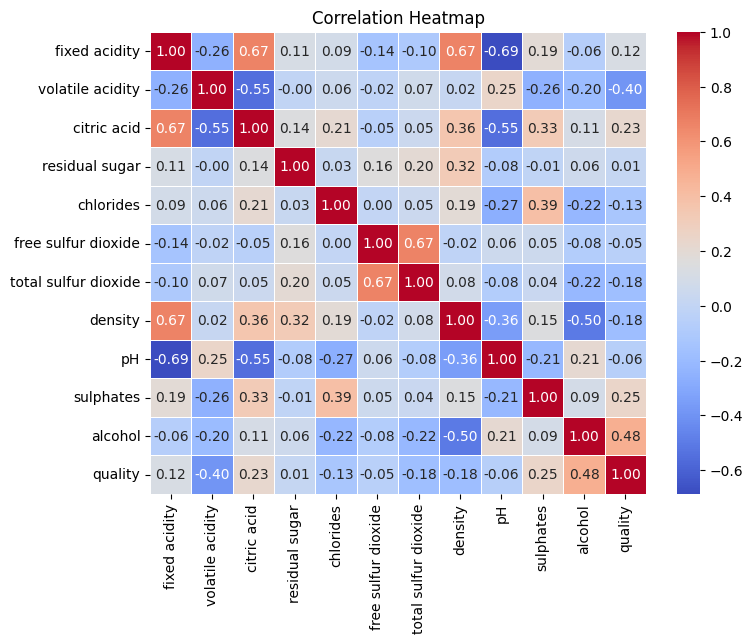

In [33]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.savefig('Corrplot_image.png', dpi=300)

# Title of the plot
plt.title('Correlation Heatmap')

#### Correlation Number Interpretation 
        Perfect Positive Correlation: 1
        Strong Positive Correlation: Between 0.7 and 1
        Moderate Positive Correlation: Between 0.3 and 0.7
        Weak Positive Correlation: Between 0 and 0.3
        No Correlation: 0
        Weak Negative Correlation: Between -0.3 and 0
        Moderate Negative Correlation: Between -0.7 and -0.3
        Strong Negative Correlation: Between -1 and -0.7
        Perfect Negative Correlation: -1

Note: Pearson's correlation measures only linear relationships. If the relationship is non-linear, other methods like Spearman’s rank correlation or Kendall’s Tau might be more appropriate.

#### Summary: 

No Strong correlation between variables identified. If there is a strong correlation between two independent variables (multi-collinearity), then it may lead to Bias and removing one of them is advisable. Other handling techniques are Dimenionality reduciton like PCA and Regularization

Also notice correaltion of variables with our target variable (quality)

#### Correlation in Different Machine Learning Algorithms
Linear Models (Linear Regression, Logistic Regression): These models are sensitive to strong correlations between features, particularly multicollinearity. Features that are strongly correlated with the target and each other should be carefully handled to avoid overfitting and unstable coefficients.

Tree-based Models (Random Forest, XGBoost): These models are less affected by multicollinearity because they do not rely on coefficient estimation. However, highly correlated features may still result in redundant splits in trees, leading to less interpretability.

Neural Networks: Neural networks generally handle correlated features better, as they automatically learn complex relationships between features. However, removing highly correlated features can help speed up training and reduce overfitting.

#### When to Use Correlation in Machine Learning
Feature Selection: Use correlation to select features that have strong relationships with the target variable and remove redundant or irrelevant features.

Feature Engineering: Strong correlation can help in creating new features (e.g., combining correlated features) to improve model performance.

Preprocessing: If multicollinearity is present, it can be addressed during preprocessing by removing correlated features or using techniques like PCA.

Summary:
Strong Correlation between features and target can improve model performance, especially if those features provide valuable information.
Strong Correlation between features (multicollinearity) can degrade model performance, especially in linear models. Regularization, feature removal, or dimensionality reduction techniques can help address this.
Correlation is a key factor in feature selection, preprocessing, and understanding how the model will behave with the data.

### Data Visualization:

#### Pair plots for multivariate relationships

In [23]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']

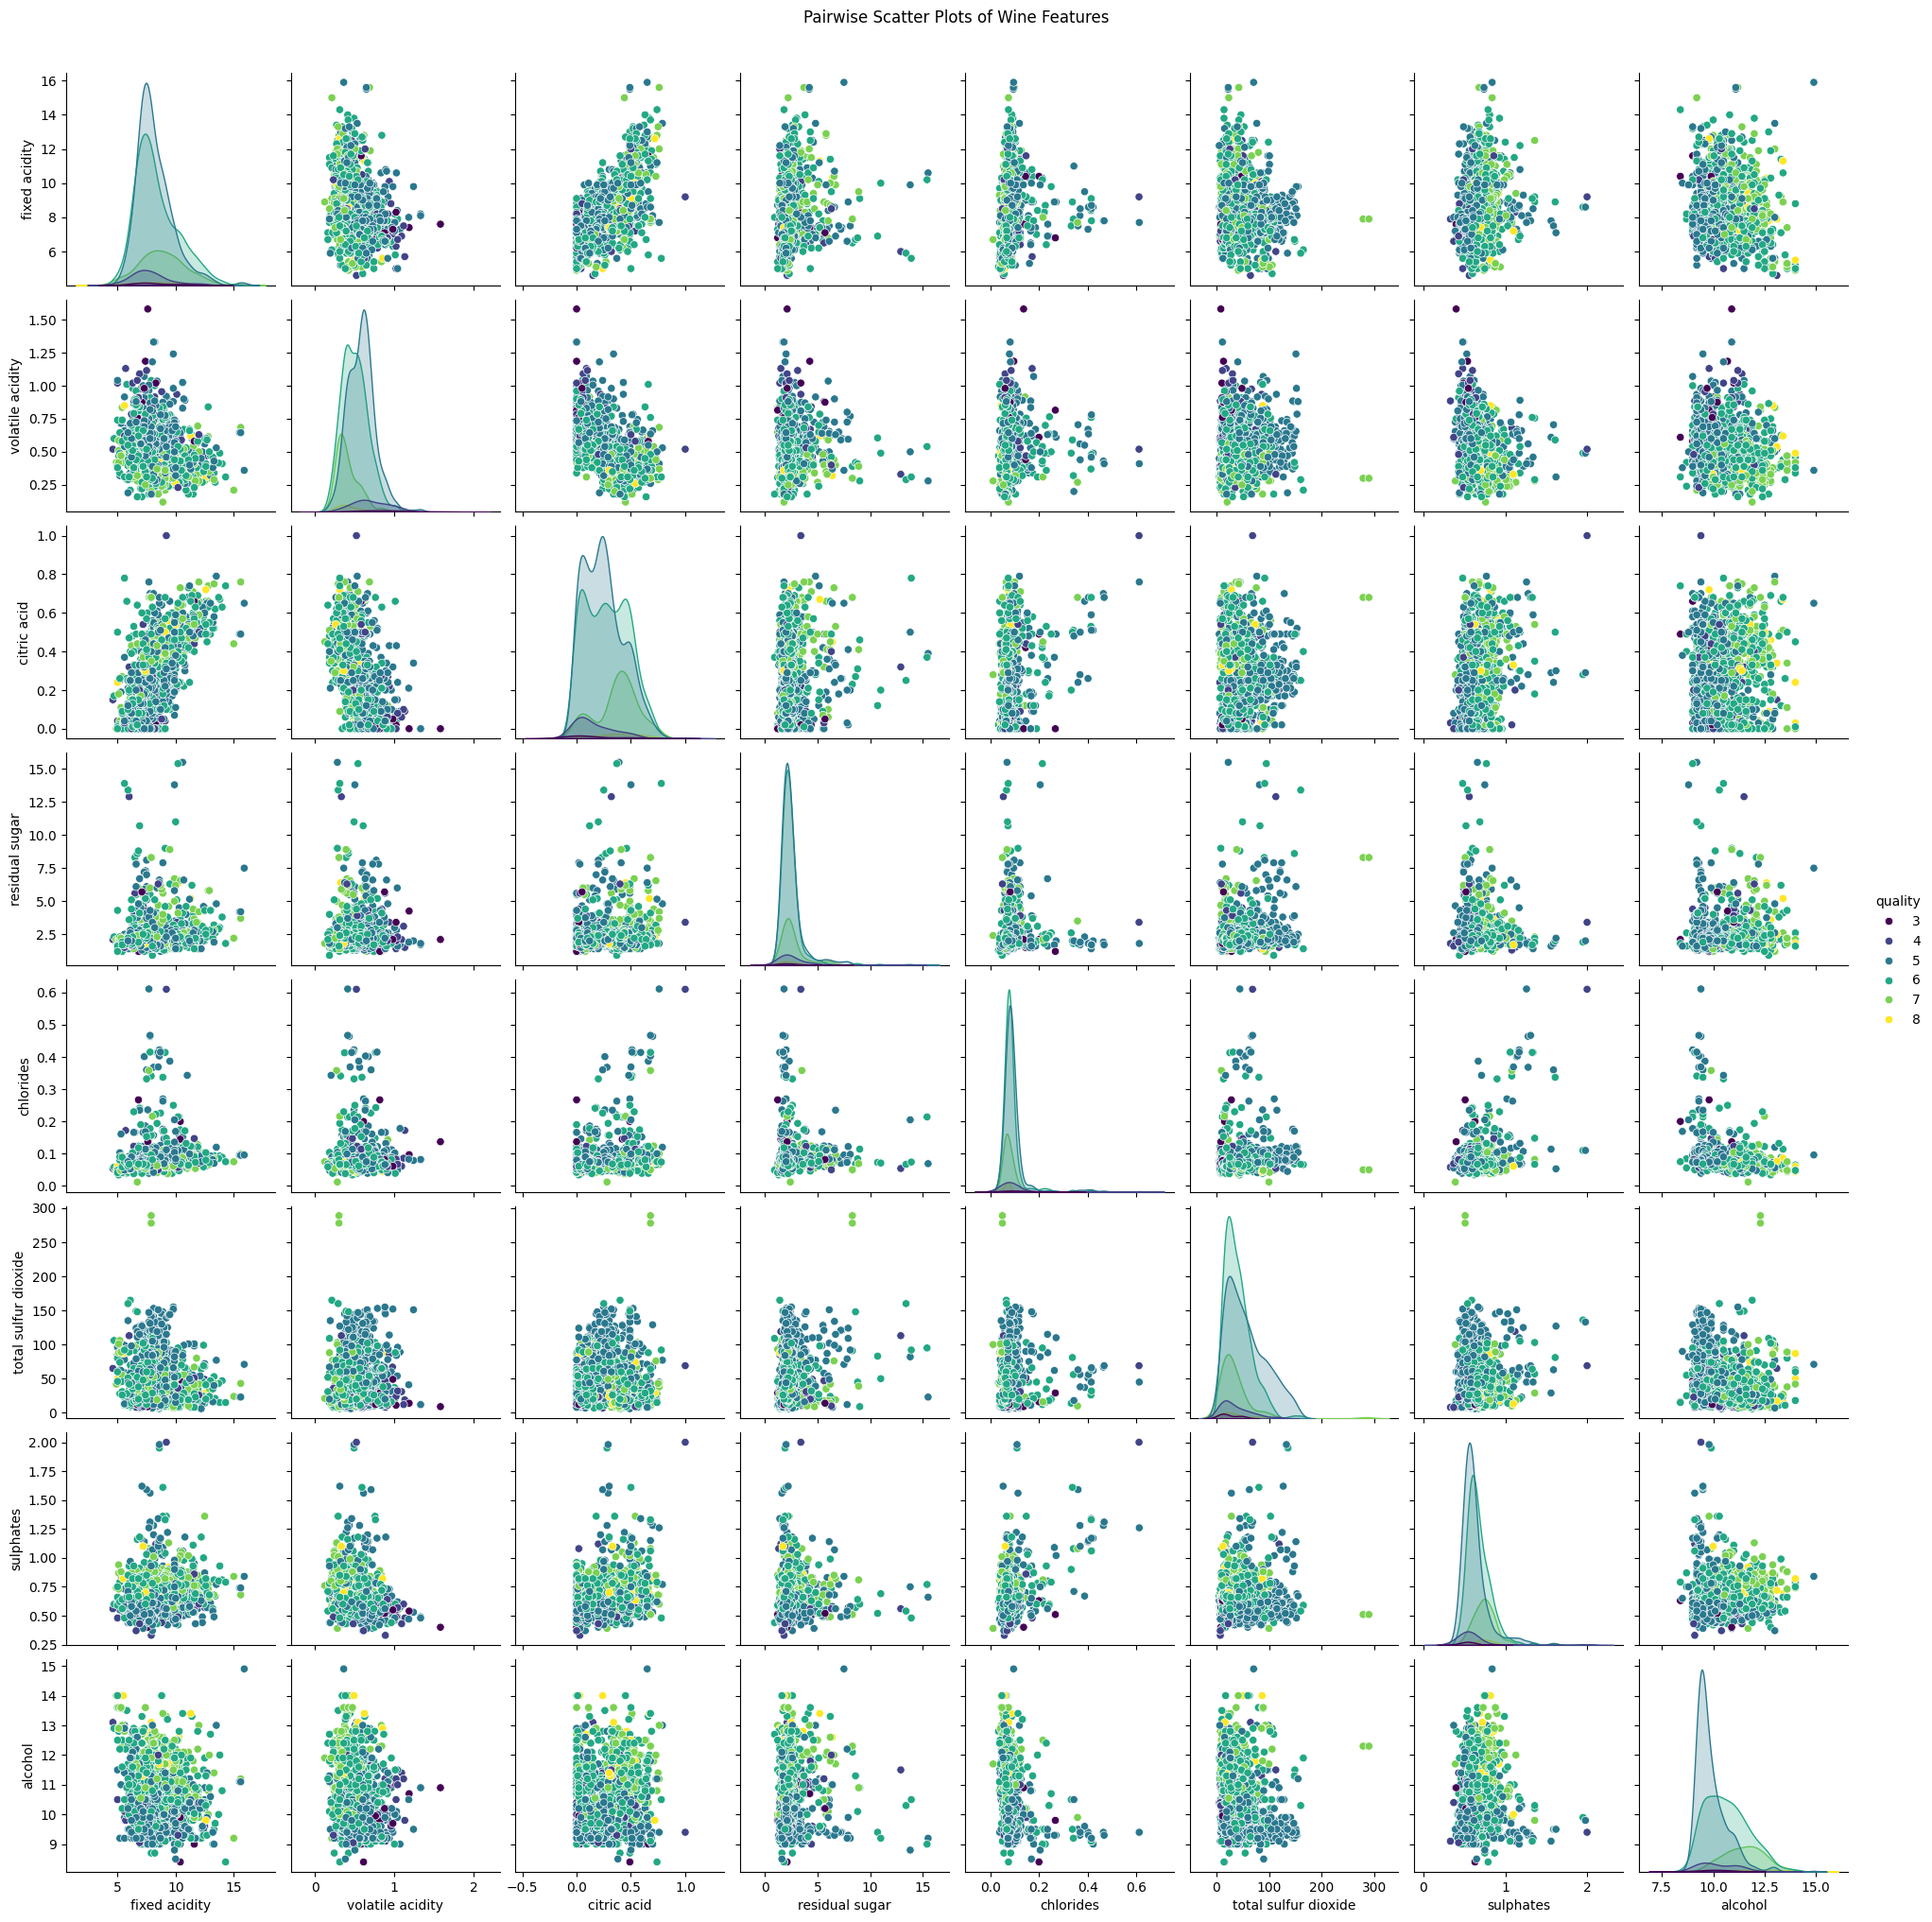

In [29]:
# Pairwise scatter plots using Seaborn
sns.pairplot(df_rw, vars = features,  hue='quality', palette='viridis', diag_kind='kde')

# Show the plot
plt.suptitle("Pairwise Scatter Plots of Wine Features", y=1.02)

# plt.savefig('pairplot_image.png', dpi=300)

plt.show()

<Figure size 1500x1100 with 0 Axes>

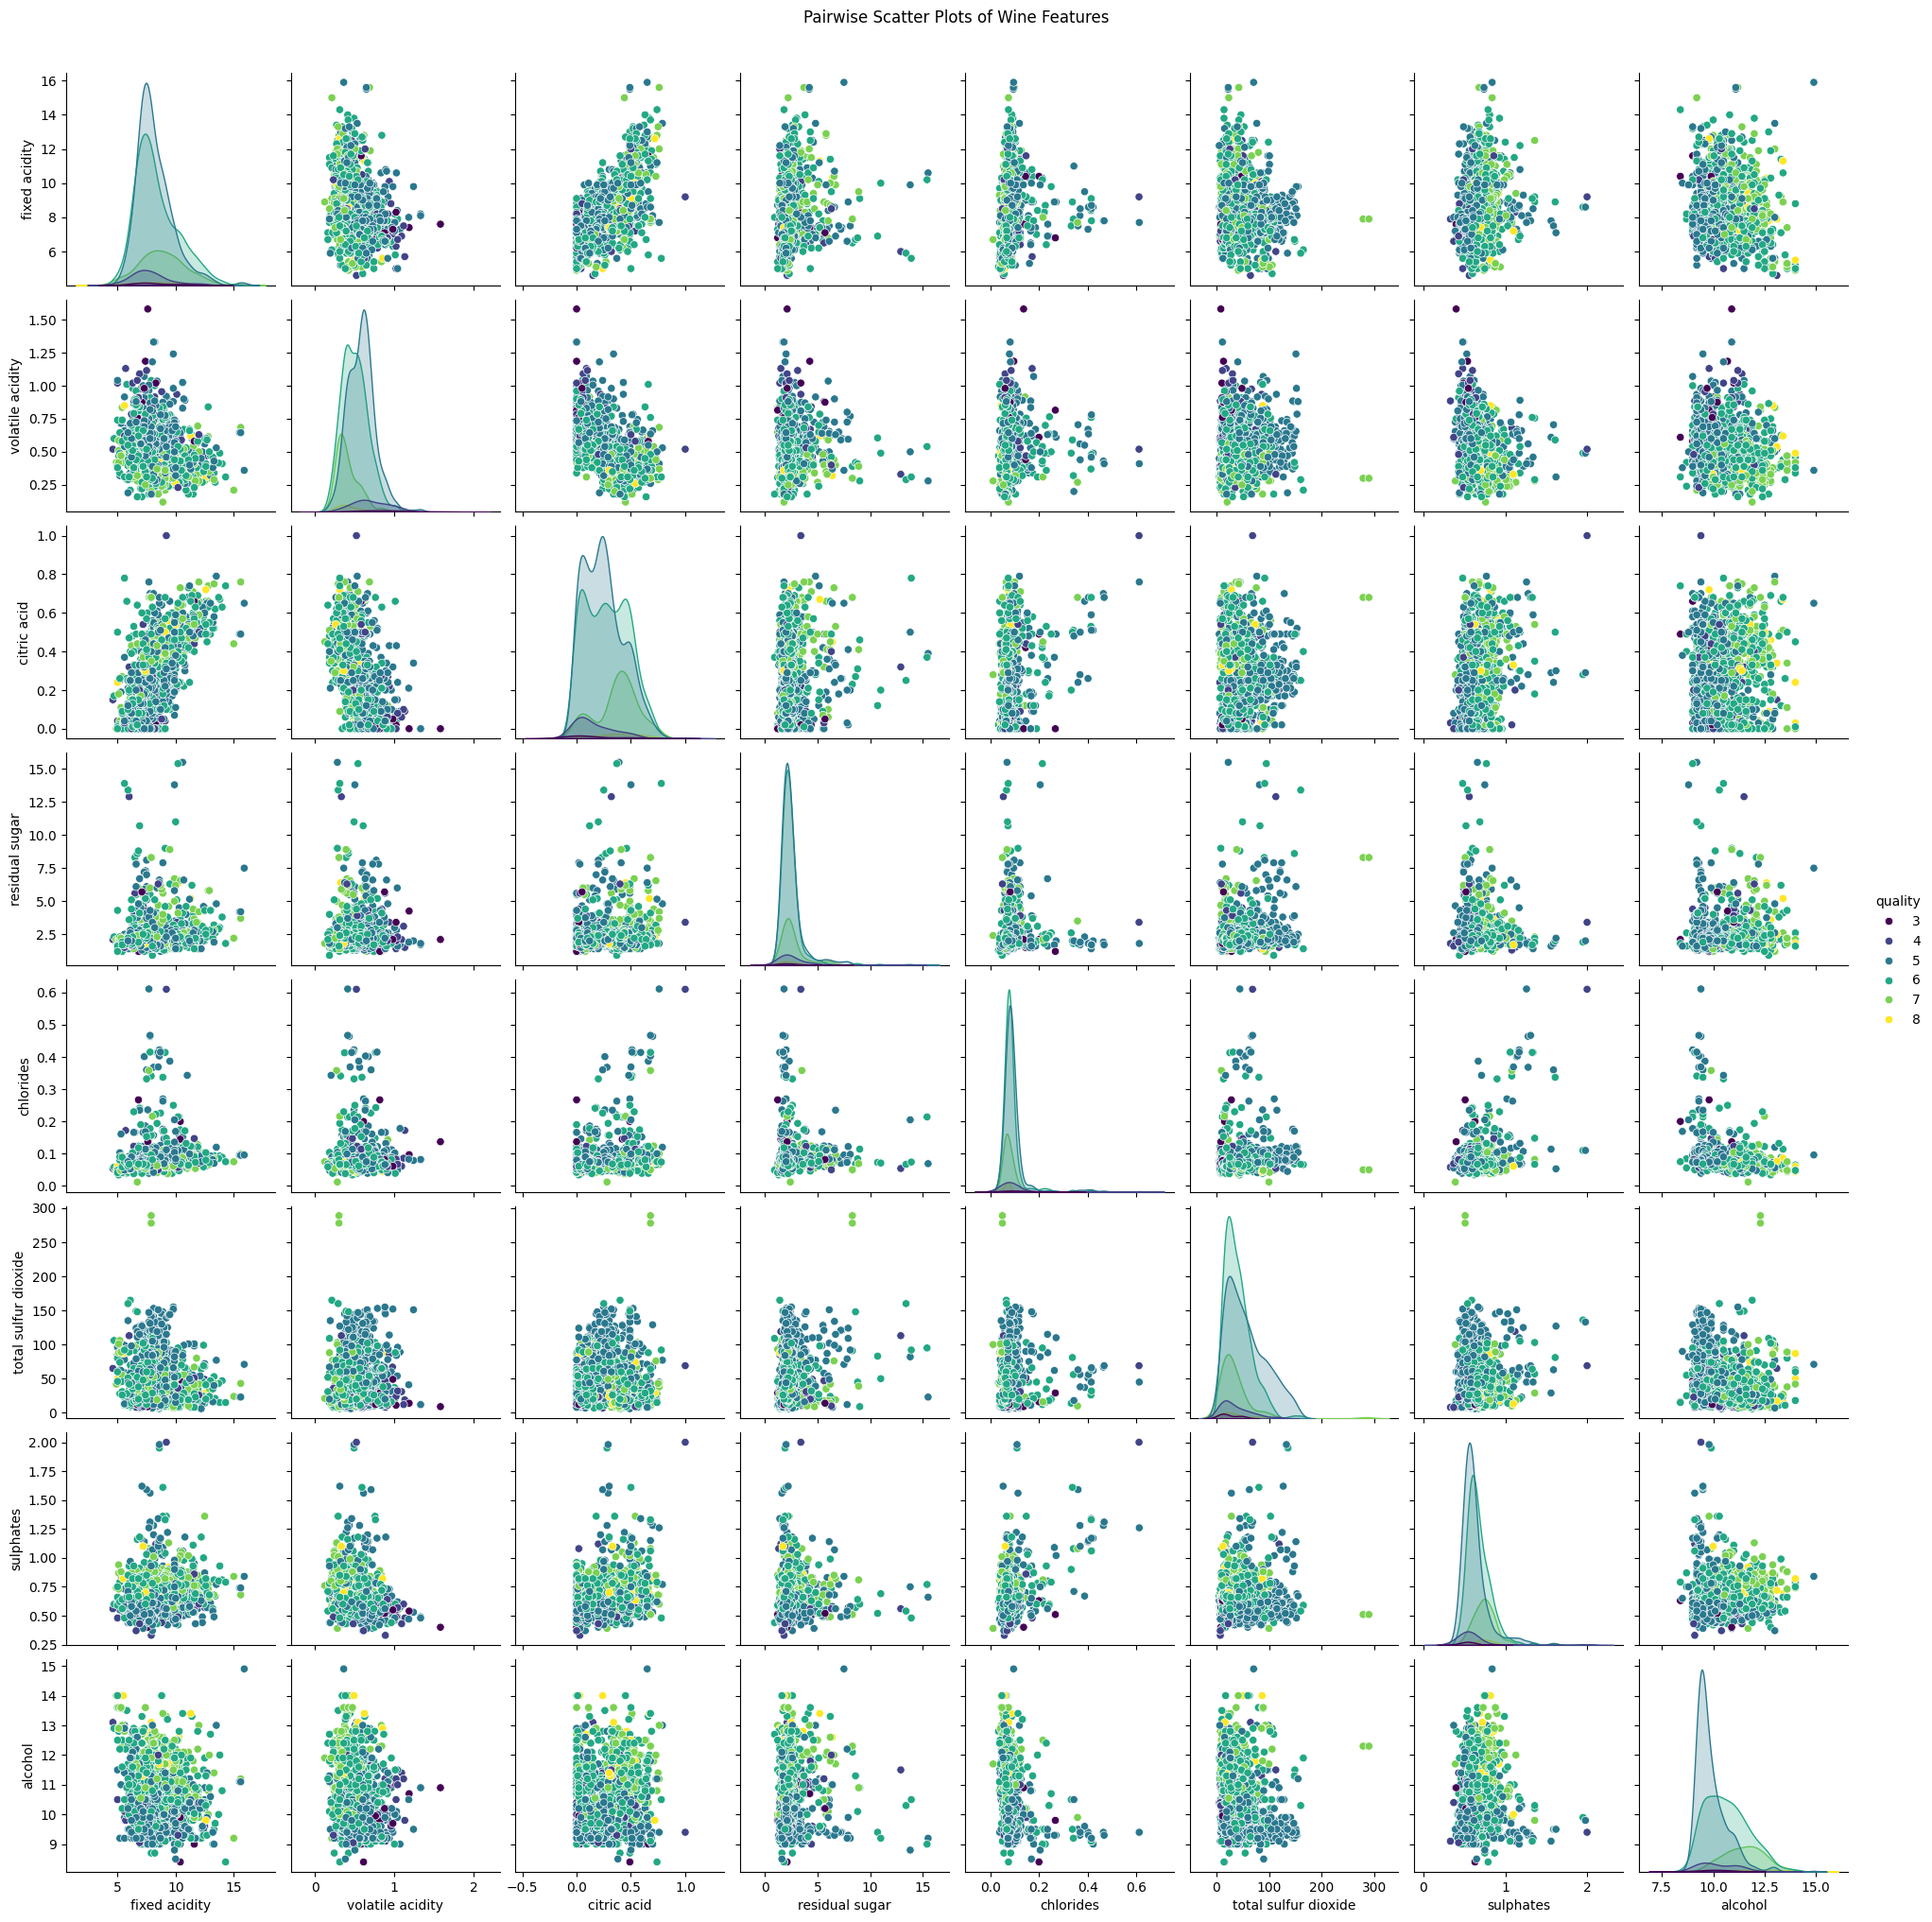

In [32]:
# plt.figure(figsize=(15, 11))  # Adjust this size as needed (12, 9 is just an example)

# # Create the pairplot
# sns.pairplot(df_rw, vars=features, hue='quality', palette='viridis', diag_kind='kde')

# # Set the title
# plt.suptitle("Pairwise Scatter Plots of Wine Features", y=1.02)

# # Save the plot as an image with DPI set for better resolution
# plt.savefig('pairplot_image.png', dpi=100)

# # Show the plot
# # plt.show()

#### Summary
    1. No clear pattern. Fixed acitidy - Citric Acid curve resemble a diagonal indicating linear relationship. Dimensionality reduction may be required
    2. Alcohol charts represent some cluster formation for higher quality scores
    3. Volatile acidity charts represent some cluster formation for lower quality scores

#### Violin plots for comparing distributions of a numeric variable across categories.

In [25]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']

C:\Users\swappati\AppData\Local\Temp\ipykernel_9328\2299275133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')


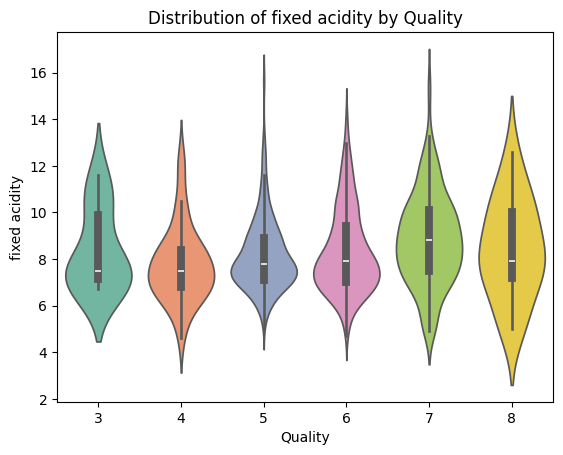

C:\Users\swappati\AppData\Local\Temp\ipykernel_9328\2299275133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')


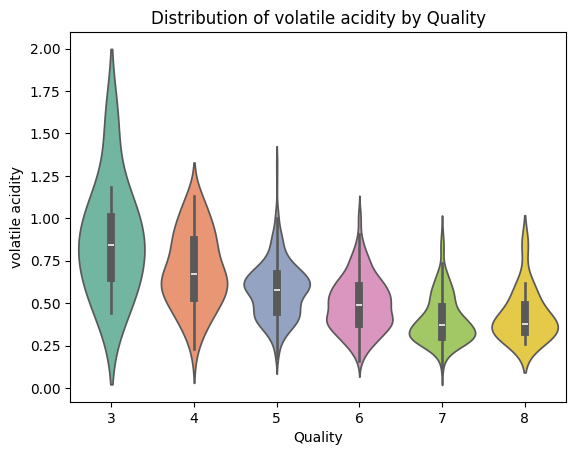

C:\Users\swappati\AppData\Local\Temp\ipykernel_9328\2299275133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')


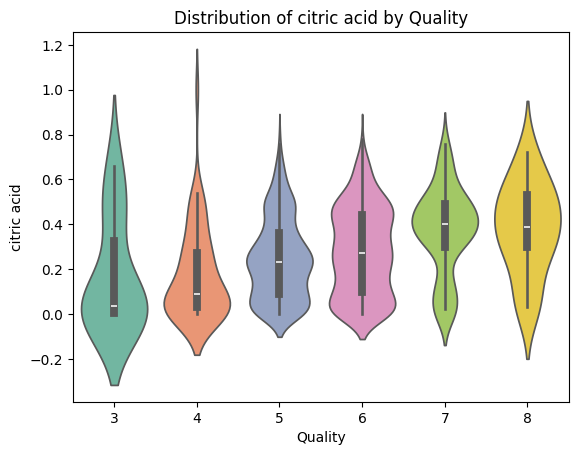

C:\Users\swappati\AppData\Local\Temp\ipykernel_9328\2299275133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')


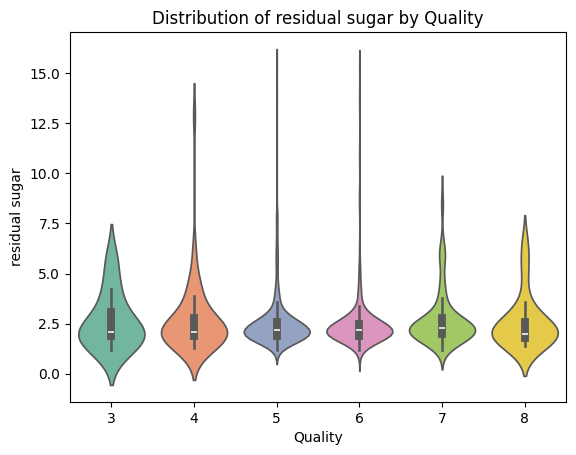

C:\Users\swappati\AppData\Local\Temp\ipykernel_9328\2299275133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')


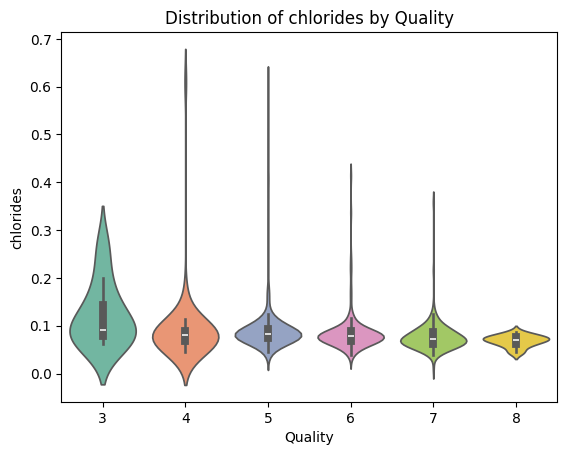

C:\Users\swappati\AppData\Local\Temp\ipykernel_9328\2299275133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')


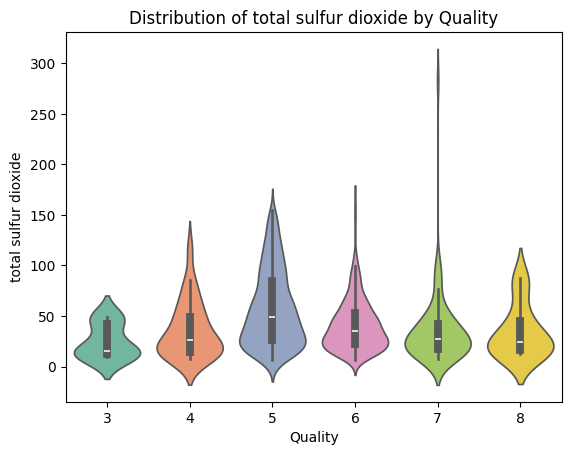

C:\Users\swappati\AppData\Local\Temp\ipykernel_9328\2299275133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')


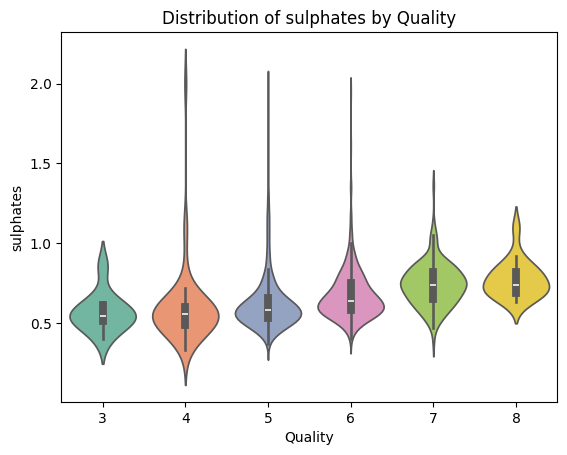

C:\Users\swappati\AppData\Local\Temp\ipykernel_9328\2299275133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')


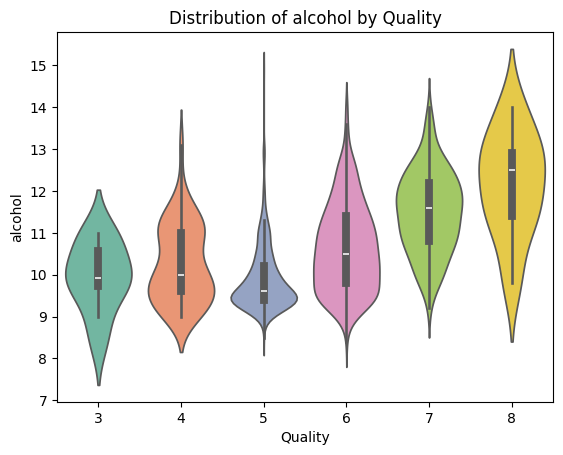

In [26]:
for feature in features:
    sns.violinplot(x='quality', y=feature, data=df_rw, palette='Set2')
    
    # Title and labels
    plt.title('Distribution of '+feature+' by Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    
    # Show the plot
    plt.show()

#### Summary


    1. Volatile acidity: Wider range for lowest quality and range narrwos done with increase in quality score. Median (white Dash) decreases with increase in quality score
    2. Citric acid: Median increases with increase in quality score
    3. Residual  sugar: Wider range with very long tails indicating significant positive skew
    4. Chlorides: Wider range with very long tails indicating significant positive skew. Highest quality score has a narrow range so could be a good inidicator for detecting this category
    5. Alcohol content: Range shifts upwards with increase in quality score and similarly Median increases with increase in quality score
    